# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On arriving at Mexico Airp...
1,✅ Trip Verified | I have flown British Airwa...
2,Not Verified | We bought tickets for a Geneva-...
3,✅ Trip Verified | Appalling service with fai...
4,✅ Trip Verified | British Airways charge you f...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Basic text preprocessing#

In [5]:
reviews = df['reviews'].str.split(pat="|", expand=True)

In [6]:
reviews

,0,1
0,✅ Trip Verified,On arriving at Mexico Airport we were told ...
1,✅ Trip Verified,I have flown British Airways for many years...
2,Not Verified,"We bought tickets for a Geneva-London flight,..."
3,✅ Trip Verified,Appalling service with failing defective fl...
4,✅ Trip Verified,British Airways charge you for the pleasure o...
...,...,...
995,✅ Trip Verified,London Heathrow to Austin. 10 hour flight in...
996,✅ Trip Verified,Mykonos to London flight delayed and waiting...
997,✅ Trip Verified,Johannesburg to Cape Town return. This flight...
998,✅ Trip Verified,Grenada to Gatwick. Having flown with BA on ...


In [7]:
df['reviews'] = reviews[1]

In [8]:
df.head()

,reviews
0,On arriving at Mexico Airport we were told ...
1,I have flown British Airways for many years...
2,"We bought tickets for a Geneva-London flight,..."
3,Appalling service with failing defective fl...
4,British Airways charge you for the pleasure o...


In [9]:
df['reviews']=df['reviews'].str.strip()

# Using wordcloud to check the frequency of the word in the dataset

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
textDict = """"""
for i in range(0, len(df['reviews'])):
    textDict+=(df['reviews'][i])

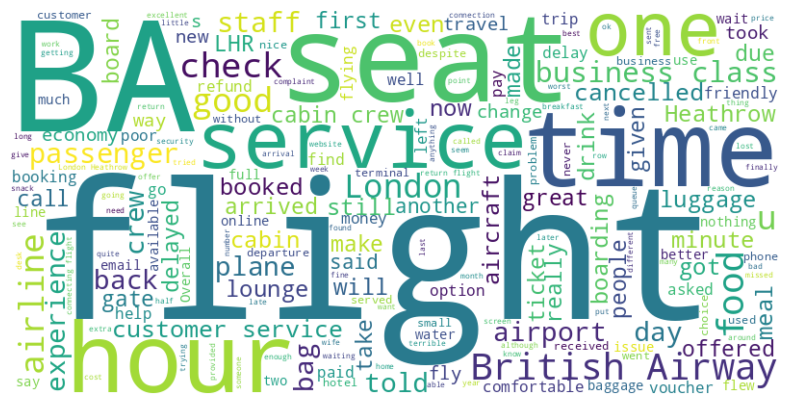

In [13]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textDict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Turn off axis labels
plt.show()

In [14]:
# calculating the length of words in the entity
df['word_count'] = df['reviews'].apply(lambda n: len(n.split()))

In [15]:
#converting each word to lowercase to deal with duplicate words
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
df.head()

,reviews,word_count
0,on arriving at mexico airport we were told tha...,419
1,i have flown british airways for many years an...,395
2,"we bought tickets for a geneva-london flight, ...",45
3,appalling service with failing defective fleet...,89
4,british airways charge you for the pleasure of...,256


In [17]:
#removing punctuation from the sentence
df['reviews'] = df['reviews'].str.replace(r'[^\w\s]', '', regex=True)

In [18]:
df.head()

,reviews,word_count
0,on arriving at mexico airport we were told tha...,419
1,i have flown british airways for many years an...,395
2,we bought tickets for a genevalondon flight bu...,45
3,appalling service with failing defective fleet...,89
4,british airways charge you for the pleasure of...,256


In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thepresiding/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df.head()

,reviews,word_count
0,arriving mexico airport told flight delayed ai...,419
1,flown british airways many years still regular...,395
2,bought tickets genevalondon flight got airport...,45
3,appalling service failing defective fleet a380...,89
4,british airways charge pleasure choosing seat ...,256


In [26]:
freq = pd.Series(' '.join(df['reviews']).split()).value_counts()[:20]

In [27]:
freq

flight      1985
ba          1257
service      731
time         542
london       478
british      453
crew         446
seat         445
class        440
airways      436
us           432
food         429
one          422
business     415
good         415
get          398
staff        395
would        389
seats        385
hours        369
Name: count, dtype: int64

In [34]:
keys=list(freq.keys())
values=list(freq.values)

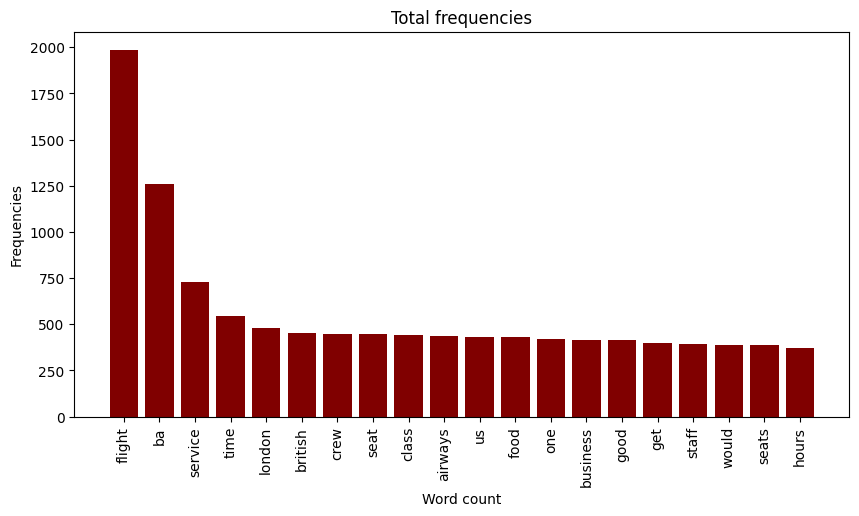

In [38]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
# the format of the bar() method is: 
# plt.bar(x_value, y_value, color, width_of_bars_inches)
plt.bar(keys, values, color ='maroon',)

#rotate the xtick
plt.xticks(rotation=90)

# x-axis label
plt.xlabel("Word count")
# y-axis label
plt.ylabel("Frequencies")
# Title of the figure
plt.title("Total frequencies")
plt.show()

In [27]:
df.tail()

,reviews,word_count
995,"mykonos london delayed waiting depart. time, p...",59
996,johannesburg cape town return. operated comair...,444
997,grenada gatwick. flown aircraft type prior ref...,245
998,prague london. two hour 27th july delayed 3 ho...,54
999,london dubai. lately frequently flying premium...,74


In [ ]:
#Spelling correction

from textblob import TextBlob
df['reviews'].apply(lambda x: str(TextBlob(x).correct()))

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/thepresiding/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Lemmatization

from textblob import Word
df['reviews'] = df['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [21]:
#N-grams

nltk.download('punkt_tab')

TextBlob(df['reviews'][0]).ngrams(2)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/thepresiding/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[WordList(['arriving', 'mexico']),
 WordList(['mexico', 'airport']),
 WordList(['airport', 'told']),
 WordList(['told', 'flight']),
 WordList(['flight', 'delayed']),
 WordList(['delayed', 'aircraft']),
 WordList(['aircraft', 'broken']),
 WordList(['broken', 'replacement']),
 WordList(['replacement', 'aircraft']),
 WordList(['aircraft', 'lhr']),
 WordList(['lhr', 'six']),
 WordList(['six', 'hour']),
 WordList(['hour', 'late']),
 WordList(['late', 'eventually']),
 WordList(['eventually', 'managed']),
 WordList(['managed', 'check']),
 WordList(['check', 'told']),
 WordList(['told', 'contrary']),
 WordList(['contrary', 'ba']),
 WordList(['ba', 'website']),
 WordList(['website', 'could']),
 WordList(['could', 'access']),
 WordList(['access', '24hour']),
 WordList(['24hour', 'grand']),
 WordList(['grand', 'lounge']),
 WordList(['lounge', 'elite']),
 WordList(['elite', 'instead']),
 WordList(['instead', 'would']),
 WordList(['would', 'use']),
 WordList(['use', 'american']),
 WordList(['americ

In [22]:
#Term frequency

tf1 = (df['reviews']).apply(lambda x: pd.Series(x.split(" ")).value_counts()).sum(axis=0).reset_index()
tf1.columns = ['words', 'tf']

In [23]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['reviews'].str.contains(word)])))

In [24]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,flight,2269.0,0.205795,466.948658
1,told,294.0,1.754464,515.812323
2,would,389.0,1.309333,509.330661
3,u,432.0,0.002002,0.864865
4,ba,1334.0,0.207024,276.170242
...,...,...,...,...
7371,sacrificed,1.0,6.907755,6.907755
7372,timely,1.0,6.907755,6.907755
7373,intrigued,1.0,6.907755,6.907755
7374,suppose,1.0,3.411248,3.411248


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(df['reviews'])

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df['reviews'])

In [82]:
print(train_bow)

  (np.int32(0), np.int32(84))	1
  (np.int32(0), np.int32(551))	3
  (np.int32(0), np.int32(46))	2
  (np.int32(0), np.int32(895))	6
  (np.int32(0), np.int32(362))	7
  (np.int32(0), np.int32(251))	1
  (np.int32(0), np.int32(44))	4
  (np.int32(0), np.int32(138))	1
  (np.int32(0), np.int32(722))	1
  (np.int32(0), np.int32(502))	1
  (np.int32(0), np.int32(803))	1
  (np.int32(0), np.int32(438))	4
  (np.int32(0), np.int32(488))	1
  (np.int32(0), np.int32(316))	4
  (np.int32(0), np.int32(532))	1
  (np.int32(0), np.int32(180))	2
  (np.int32(0), np.int32(102))	4
  (np.int32(0), np.int32(966))	1
  (np.int32(0), np.int32(229))	4
  (np.int32(0), np.int32(28))	1
  (np.int32(0), np.int32(519))	2
  (np.int32(0), np.int32(463))	1
  (np.int32(0), np.int32(992))	5
  (np.int32(0), np.int32(940))	2
  (np.int32(0), np.int32(60))	1
  :	:
  (np.int32(998), np.int32(392))	1
  (np.int32(998), np.int32(772))	1
  (np.int32(998), np.int32(891))	1
  (np.int32(998), np.int32(783))	1
  (np.int32(998), np.int32(112))	1

In [27]:
# Implementation of sentiment analysis with TextBlob

#loop through the col series
#perform sentiment analysis on each index
polarity=[]
subjectivity=[]
for text in df['reviews']:
    blob = TextBlob(text)
    polarity.append(blob.sentiment.polarity)
    subjectivity.append(blob.sentiment.subjectivity)

df['polarity'] = [x for x in polarity]
df['subjectivity'] = [x for x in subjectivity]

In [28]:
df.head()

,reviews,word_count,polarity,subjectivity
0,arriving mexico airport told flight delayed ai...,419,-0.057540,0.336111
1,flown british airway many year still regularly...,395,0.023918,0.277017
2,bought ticket genevalondon flight got airport ...,45,0.000000,0.500000
3,appalling service failing defective fleet a380...,89,0.008333,0.625000
4,british airway charge pleasure choosing seat p...,256,0.156419,0.464912


In [33]:
#Emotion Detection

from nrclex import NRCLex

# Initialize the Sentiment column with default value
df['Sentiment'] = None

# Loop through each review in the DataFrame
for i, text in enumerate(df['reviews']):
    sentiment = NRCLex(text)
    
    # Get sentiment scores
    positive_score = sentiment.affect_frequencies.get('positive', 0)
    negative_score = sentiment.affect_frequencies.get('negative', 0)
    
    # Determine the overall sentiment based on scores and assign it to the 'Sentiment' column
    if positive_score > negative_score:
        df.at[i, 'Sentiment'] = "Positive"
    elif negative_score > positive_score:
        df.at[i, 'Sentiment'] = "Negative"
    else:
        df.at[i, 'Sentiment'] = "Neutral"


In [34]:
df.head(50)

,reviews,word_count,polarity,subjectivity,Sentiment
0,arriving mexico airport told flight delayed ai...,419,-0.057540,0.336111,Negative
1,flown british airway many year still regularly...,395,0.023918,0.277017,Negative
2,bought ticket genevalondon flight got airport ...,45,0.000000,0.500000,Neutral
3,appalling service failing defective fleet a380...,89,0.008333,0.625000,Positive
4,british airway charge pleasure choosing seat p...,256,0.156419,0.464912,Neutral
5,wrong guy people pay lot money business class ...,96,0.019048,0.423810,Positive
6,booked two business class seat british airway ...,130,-0.287500,0.350000,Positive
7,ive flown many airline recent experience briti...,65,0.085431,0.372086,Positive
8,recently flew new york back london ba wasnt fi...,384,0.185782,0.503962,Positive
9,ba business class europe seat economy simply e...,189,0.062381,0.509048,Positive


In [36]:
positive_count = 0
negative_count = 0
neutral_count = 0

for i in range(0, len(df['Sentiment'])):
    if df['Sentiment'][i] == 'Positive':
        positive_count += 1
    elif df['Sentiment'][i] == 'Negative':
        negative_count += 1
    else:
        neutral_count += 1

In [41]:
print(f"{positive_count}, {negative_count},{neutral_count}")

649, 253,98


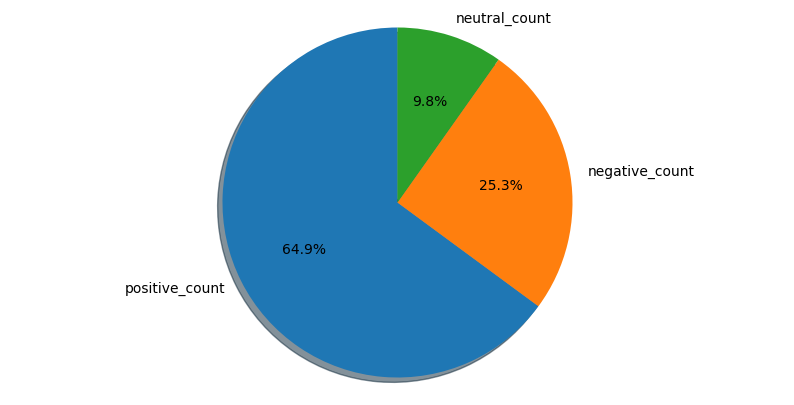

In [50]:
fig = plt.figure(figsize = (10, 5))

plt.pie([positive_count, negative_count,neutral_count], labels=["positive_count", "negative_count", "neutral_count"], 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [21]:
positive_reviews = df[df['Sentiment'] == 'positive']['reviews']

KeyError: 'Sentiment'

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

# Assume df is the DataFrame with 'reviews' and 'sentiment' columns

negative_reviews = df[df['Sentiment'] == 'negative']['reviews']
neutral_reviews = df[df['Sentiment'] == 'neutral']['reviews']

def get_top_ngrams(corpus, ngram_range=(1, 2), top_n=10):
    """Extract top n-grams from the corpus."""
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

# Get top 10 bi-grams for each sentiment
top_positive_ngrams = get_top_ngrams(positive_reviews, ngram_range=(2, 2), top_n=10)
top_negative_ngrams = get_top_ngrams(negative_reviews, ngram_range=(2, 2), top_n=10)
top_neutral_ngrams = get_top_ngrams(neutral_reviews, ngram_range=(2, 2), top_n=10)

# Convert to DataFrame for easy visualization or further analysis
positive_df = pd.DataFrame(top_positive_ngrams, columns=['bigram', 'frequency'])
negative_df = pd.DataFrame(top_negative_ngrams, columns=['bigram', 'frequency'])
neutral_df = pd.DataFrame(top_neutral_ngrams, columns=['bigram', 'frequency'])

print("Top Positive n-grams:\n", positive_df)
print("Top Negative n-grams:\n", negative_df)
print("Top Neutral n-grams:\n", neutral_df)


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [47]:
df.to_csv('saved_result.csv', index = False, encoding='utf-8')